## Clustering students with KMeans Clustering

In [97]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pickle
data= pd.read_csv("C:\Dataset\exams.csv")
data2= pd.read_csv("C:\Dataset\exams.csv")
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [98]:
#bedanya standard lunch vs free/reduced lunch
# standar lunch = makan siang porsi standar, kulaitas standar / normal
# free/reduced lunch = makan siang porsi sedikit, kualitas rendah
#test preparation = bimbel, les, dll
#get number of data
data.shape

(1000, 8)

In [99]:
#drop the 6th,7th,8th columns
data = data.drop(['math score','reading score','writing score'], axis=1)
#change column name race/ethnicity to race
data.rename(columns = {'race/ethnicity':'race'}, inplace = True)
data.rename(columns = {'parental level of education':'parenteducation'}, inplace = True)
data.rename(columns = {'test preparation course':'testpreparation'}, inplace = True)
data=data

data.head(10)


,gender,race,parenteducation,lunch,testpreparation
0,male,group A,high school,standard,completed
1,female,group D,some high school,free/reduced,none
2,male,group E,some college,free/reduced,none
3,male,group B,high school,standard,none
4,male,group E,associate's degree,standard,completed
5,female,group D,high school,standard,none
6,female,group A,bachelor's degree,standard,none
7,male,group E,some college,standard,completed
8,male,group D,high school,standard,none
9,male,group C,some college,free/reduced,none


In [100]:
#categorize data
#normalisasi data
changeedu = {'some high school': 0, 'high school': 0.2, 'some college': 0.4, 'associate\'s degree': 0.6, 'bachelor\'s degree': 0.8, 'master\'s degree': 1}
changelunch = {'free/reduced': 0, 'standard': 1}
changetest = {'none': 0, 'completed': 1}
changegender = {'male': 0, 'female' : 1}
changerace = {'group A': 0, 'group B': 0.25, 'group C': 0.5, 'group D': 0.75, 'group E': 1}

data.parenteducation = [changeedu[item] for item in data.parenteducation]
data.lunch = [changelunch[item] for item in data.lunch]
data.testpreparation = [changetest[item] for item in data.testpreparation]
data.gender = [changegender[item] for item in data.gender]
data.race = [changerace [item] for item in data.race]

data.head(20)

,gender,race,parenteducation,lunch,testpreparation
0,0,0.00,0.2,1,1
1,1,0.75,0.0,0,0
2,0,1.00,0.4,0,0
3,0,0.25,0.2,1,0
4,0,1.00,0.6,1,1
5,1,0.75,0.2,1,0
6,1,0.00,0.8,1,0
7,0,1.00,0.4,1,1
8,0,0.75,0.2,1,0
9,0,0.50,0.4,0,0


c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

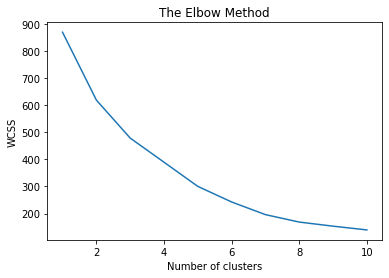

In [101]:
#elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
                
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [102]:
#kmeans with 4 cluster
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
y_kmeans

c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([1, 2, 4, 3, 1, 0, 0, 1, 3, 4, 1, 1, 1, 1, 1, 4, 3, 1, 2, 4, 0, 3,
       1, 2, 4, 4, 0, 3, 1, 2, 3, 4, 4, 1, 1, 0, 1, 4, 2, 3, 2, 3, 1, 0,
       3, 3, 4, 1, 0, 4, 3, 2, 0, 2, 4, 1, 1, 1, 2, 3, 4, 0, 1, 1, 1, 2,
       3, 2, 3, 0, 1, 3, 0, 1, 4, 0, 0, 2, 3, 3, 0, 2, 2, 1, 2, 0, 2, 3,
       0, 3, 4, 3, 0, 1, 4, 1, 1, 4, 3, 3, 4, 1, 3, 3, 0, 0, 3, 3, 3, 4,
       1, 0, 0, 4, 3, 1, 2, 1, 4, 1, 1, 1, 1, 1, 0, 3, 3, 3, 1, 2, 2, 1,
       3, 3, 3, 4, 1, 1, 4, 2, 4, 2, 0, 0, 1, 2, 1, 3, 1, 4, 1, 2, 0, 3,
       2, 0, 4, 2, 2, 4, 1, 4, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 2, 4, 1, 2,
       0, 4, 2, 1, 0, 0, 0, 0, 1, 0, 3, 4, 3, 4, 1, 0, 4, 1, 0, 2, 3, 4,
       1, 3, 1, 3, 3, 1, 2, 1, 1, 3, 0, 0, 2, 3, 1, 3, 1, 2, 0, 2, 4, 3,
       3, 1, 0, 0, 3, 3, 4, 2, 0, 4, 0, 3, 4, 3, 0, 1, 0, 0, 3, 1, 0, 1,
       3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 0, 2, 0, 3, 0, 2, 2, 0, 0, 3, 3,
       1, 3, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 3, 1, 2, 4, 4, 3,
       0, 3, 2, 1, 3, 2, 4, 2, 2, 0, 4, 2, 3, 3, 4,

In [103]:
#put the cluster result into the data
data['cluster'] = y_kmeans
data.head(20)

,gender,race,parenteducation,lunch,testpreparation,cluster
0,0,0.00,0.2,1,1,1
1,1,0.75,0.0,0,0,2
2,0,1.00,0.4,0,0,4
3,0,0.25,0.2,1,0,3
4,0,1.00,0.6,1,1,1
5,1,0.75,0.2,1,0,0
6,1,0.00,0.8,1,0,0
7,0,1.00,0.4,1,1,1
8,0,0.75,0.2,1,0,3
9,0,0.50,0.4,0,0,4


In [104]:
data2['cluster'] = y_kmeans
data2 = data2.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
data2.rename(columns = {'math score':'math'}, inplace = True)
data2.rename(columns = {'reading score':'reading'}, inplace = True)
data2.rename(columns = {'writing score':'writing'}, inplace = True)
data2 = data2

print("size: ",data2.shape)
data2.head(10)

size:  (1000, 4)


,math,reading,writing,cluster
0,67,67,63,1
1,40,59,55,2
2,59,60,50,4
3,77,78,68,3
4,78,73,68,1
5,63,77,76,0
6,62,59,63,0
7,93,88,84,1
8,63,56,65,3
9,47,42,45,4


In [105]:
#get the average of data2
data2.groupby('cluster').mean()

,math,reading,writing
cluster,,,
0,66.156398,72.649289,71.710900
1,73.346667,76.875556,78.115556
2,54.781250,66.118750,65.131250
3,72.101852,66.601852,64.023148
4,61.675532,60.696809,57.345745


#### Cluster 0 has the highest average score, followed closely by cluster 1, cluster 2 has the lowest average score with significant difference

<AxesSubplot:xlabel='cluster'>

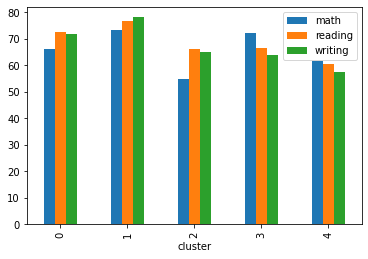

In [106]:
#get the average of math,reading, writing
data2.groupby('cluster').mean().plot.bar()


In [107]:
#get amount of data in cluster 0,1,2
data2.groupby('cluster').size()


cluster
0    211
1    225
2    160
3    216
4    188
dtype: int64

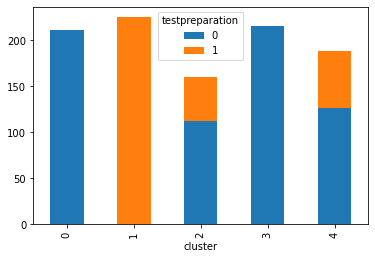

In [108]:
#visualize data column cluster and testpreparation
data.groupby(['cluster','testpreparation']).size().unstack().plot.bar(stacked=True)
plt.show()

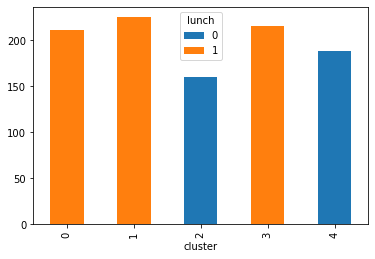

In [109]:
data.groupby(['cluster','lunch']).size().unstack().plot.bar(stacked=True)
plt.show()

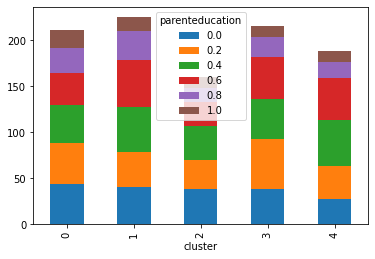

In [110]:
data.groupby(['cluster', 'parenteducation']).size().unstack().plot.bar(stacked=True)
plt.show()

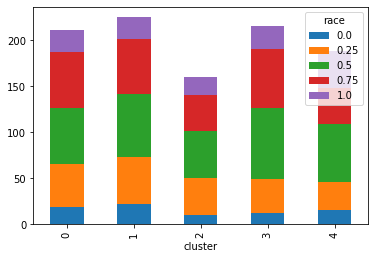

In [111]:
data.groupby(['cluster', 'race']).size().unstack().plot.bar(stacked=True)
plt.show()

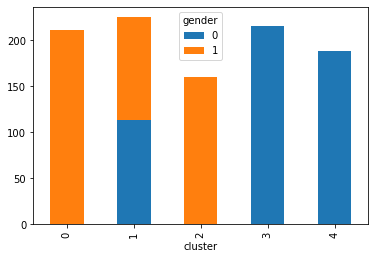

In [112]:
data.groupby(['cluster', 'gender']).size().unstack().plot.bar(stacked=True)
plt.show()

In [113]:
data.to_csv('hasil_cluster_kmeans.csv',index=False)

In [114]:
#get sum of math+reading+writing for each cluster
data2['average'] = (data2['math'] + data2['reading'] + data2['writing'] ) / 3
data2.groupby('cluster').mean()

,math,reading,writing,average
cluster,,,,
0,66.156398,72.649289,71.710900,70.172196
1,73.346667,76.875556,78.115556,76.112593
2,54.781250,66.118750,65.131250,62.010417
3,72.101852,66.601852,64.023148,67.575617
4,61.675532,60.696809,57.345745,59.906028
